Load JFK-focused raw adjusted data and our featured dataset (with departure country)

In [37]:
import pandas as pd
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

#featured file
filename    = "JFK.traffic.csv"
jfk_traffic = pd.read_csv("csvs/"+filename)
filename    = "MABR_NYC_ADJ_HIST_RESULTS.txt"
travelport  = pd.read_csv("csvs/"+filename,sep="|")
travelport  = travelport[travelport.DST=='JFK']

Plot monthly basis totals, filtering those that have passed the minimum threshold TTL_BKGS>2

TOTAL 18862976.0
ORIGINS ['US' 'DE' 'MX' 'CN' 'CA' 'DO' 'GB' 'PR' 'IT' 'FR' 'MC']


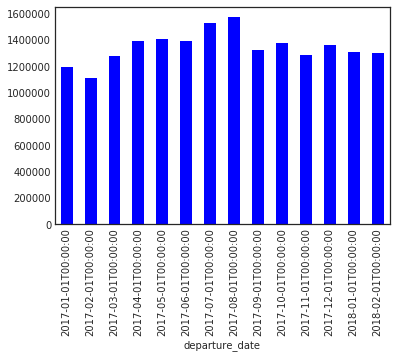

In [68]:
jfk_traffic.groupby("departure_date")['totals'].sum().plot(kind="bar")
print "TOTAL",jfk_traffic['totals'].sum()
print "ORIGINS",jfk_traffic['departure_country'].unique()


TOTAL 18949770.77


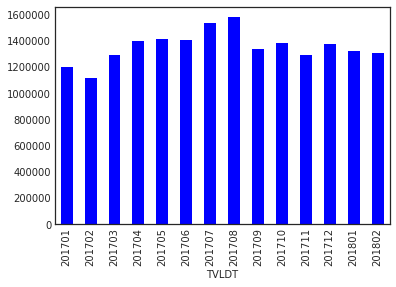

In [51]:
travelport.groupby("TVLDT")['TTL_BKGS'].sum().plot(kind="bar")

print "TOTAL",travelport[travelport.DST=='JFK']['TTL_BKGS'].sum()

Let's focus in the three disaggragated countries that JFK share their data: US,MX and CA
https://www.panynj.gov/airports/pdf-traffic/JFK_DEC_2017.pdf

US departure_date
2017-01-01T00:00:00    761184
2017-02-01T00:00:00    712647
2017-03-01T00:00:00    828705
2017-04-01T00:00:00    872174
2017-05-01T00:00:00    875894
2017-06-01T00:00:00    854068
2017-07-01T00:00:00    901495
2017-08-01T00:00:00    931554
2017-09-01T00:00:00    792308
2017-10-01T00:00:00    852632
2017-11-01T00:00:00    837240
2017-12-01T00:00:00    859146
2018-01-01T00:00:00    854980
2018-02-01T00:00:00    843902
Name: totals, dtype: float64


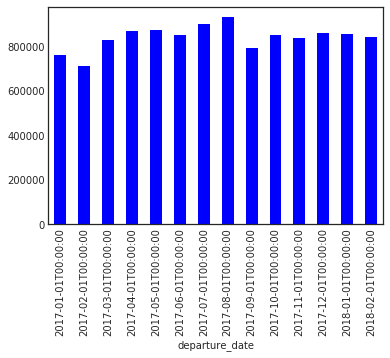

MX departure_date
2017-01-01T00:00:00    63540
2017-02-01T00:00:00    59342
2017-03-01T00:00:00    66846
2017-04-01T00:00:00    63796
2017-05-01T00:00:00    61514
2017-06-01T00:00:00    58103
2017-07-01T00:00:00    66467
2017-08-01T00:00:00    70496
2017-09-01T00:00:00    58335
2017-10-01T00:00:00    61483
2017-11-01T00:00:00    64838
2017-12-01T00:00:00    74799
2018-01-01T00:00:00    73567
2018-02-01T00:00:00    75029
Name: totals, dtype: float64


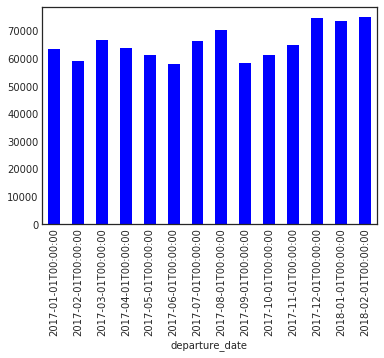

CA departure_date
2017-01-01T00:00:00    15253
2017-02-01T00:00:00    15024
2017-03-01T00:00:00    18500
2017-04-01T00:00:00    19272
2017-05-01T00:00:00    21143
2017-06-01T00:00:00    21972
2017-07-01T00:00:00    25418
2017-08-01T00:00:00    24895
2017-09-01T00:00:00    22775
2017-10-01T00:00:00    21054
2017-11-01T00:00:00    16541
2017-12-01T00:00:00    17350
2018-01-01T00:00:00    15416
2018-02-01T00:00:00    17346
Name: totals, dtype: float64


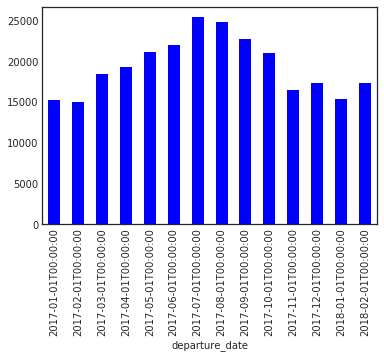

In [79]:
countries = [
    'US',
    'MX',
    'CA'
]
for cc in countries:
    country = jfk_traffic[jfk_traffic['departure_country']==cc]
    print cc,country.groupby("departure_date")['totals'].sum()
    country.groupby("departure_date")['totals'].sum().plot(kind="bar")
    plt.show()

Since official traffic are incoming and outcoming, lets supose that provided illuminate data accounts for the half of Passengers
```
DOMESTIC - 26,920,199
CANADA   - 503,102
MEXICO   - 1,731,445
```


In [91]:
panynj_data = {
    "US":26920199/2,
    "CA":503102/2,
    "MX":1731445/2,
}
country_total = {}
for cc in countries:
    country = jfk_traffic[
        (jfk_traffic['departure_country']==cc) &        #filter by country
        (jfk_traffic['departure_date']<'2018-01-01')    #filter by 2017
    ]
    country_total[cc] = country['totals'].sum()

print "SIMILARITY"
for cc,pax in panynj_data.iteritems():
    print "-",cc,"{:0.2f} %".format(100*(1 - pax/float(country_total[cc])))

 SIMILARITY
- CA -5.16 %
- MX -12.50 %
- US -33.55 %
